In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Hierarchical Clustering and Induced Metrics

Suppose that we are unable to supply a metric for our data, but that we can measure a dissimilarity value $ \delta(x, x') $ for every pair of samples, where $ \delta(x, x') \geq 0 $, with equality holding if and only if $ x = x' $. Then agglomerative clustering can still be used, with the understanding that the nearest pair of clusters is the least dissimilar pair.

Interestingly enough, if we define the dissimilarity between two clusters by

$$
\delta_{\text{min}}(D_i, D_j) = \min \delta(x, x') \quad \text{for} \quad x \in D_i, x' \in D_j \tag{79}
$$

or

$$
\delta_{\text{max}}(D_i, D_j) = \max \delta(x, x') \quad \text{for} \quad x \in D_i, x' \in D_j \tag{80}
$$

then the hierarchical clustering procedure will induce a distance function for the given set of $ n $ samples. Furthermore, the ranking of the distances between samples will be invariant to any monotonic transformation of the dissimilarity values.

We can now define a generalized distance $ d(x, x') $ between $ x $ and $ x' $ as the value of the lowest level clustering for which $ x $ and $ x' $ are in the same cluster. To show that this is a legitimate distance function, or metric, we need to show four things:

1. **Non-negativity**: $ d(x, x') \geq 0 $
2. **Reflexivity**: $ d(x, x') = 0 $ if and only if $ x = x' $
3. **Symmetry**: $ d(x, x') = d(x', x) $
4. **Triangle Inequality**: $ d(x, x') + d(x', x'') \geq d(x, x'') $

It is easy to see that these requirements are satisfied, and hence that dissimilarity can induce a metric.

For our formula for dissimilarity, we have moreover that

$$
d(x, x') \leq \max[d(x, x'), d(x', x'')] \quad \text{for any} \quad x' \tag{81}
$$

In which case we say that $ d(\cdot, \cdot) $ is an **ultrametric**.

Ultrametric criteria can be more immune to local minima problems since a stricter ordering of distances among clusters is maintained.

---

##  The Problem of Validity

With almost all of the procedures considered thus far, we have assumed that the number of clusters is known. That is a reasonable assumption if we are upgrading a classifier that has been designed on a small labeled set or if we are tracking slowly time-varying patterns. However, it may be an unjustified assumption if we are exploring a data set whose properties are, at base, unknown.

Thus, a recurring problem in cluster analysis is that of deciding just how many clusters are present. When clustering is done by extremizing a criterion function, a common approach is to repeat the clustering procedure for $ c = 1, c = 2, c = 3, \dots $, and to see how the criterion function changes with $ c $. For example, it is clear that the sum-of-squared-error criterion $ J_e $ must decrease monotonically with $ c $, since the squared error can be reduced each time $ c $ is increased merely by transferring a single sample to a new singleton cluster.

If the $ n $ samples are really grouped into $ \hat{c} $ compact, well-separated clusters, one would expect to see $ J_e $ decrease rapidly until $ c = \hat{c} $, decreasing much more slowly thereafter until it reaches zero at $ c = n $.

Similar arguments have been advanced for hierarchical clustering procedures and can be apparent in a **dendrogram**, the usual assumption being that a large disparity in the levels at which clusters merge indicates the presence of natural groupings.

A more formal approach to this problem is to devise some measure of goodness of fit that expresses how well a given $ c $-cluster description matches the data. The chi-squared and Kolmogorov-Smirnov statistics are the traditional measures of goodness of fit, but the curse of dimensionality usually demands the use of simpler measures, some criterion function, which we denote $ J(c) $.

Since we expect a description in terms of $ c + 1 $ clusters to give a better fit than a description in terms of $ c $ clusters, we would like to know what constitutes a statistically significant improvement in $ J(c) $. A formal way to proceed is to advance the null hypothesis that there are exactly $ c $ clusters present, and to compute the sampling distribution for $ J(c+1) $ under this hypothesis. This distribution tells us what kind of apparent improvement to expect when a $ c $-cluster description is actually correct.

The decision procedure would be to accept the null hypothesis if the observed value of $ J(c + 1) $ falls within limits corresponding to an acceptable probability of false rejection. Unfortunately, it is usually very difficult to do anything more than crudely estimate the sampling distribution of $ J(c + 1) $. The resulting solutions are not above suspicion, and the statistical problem of testing cluster validity is still essentially unsolved.

However, under the assumption that a suspicious test is better than none, we include the following approximate analysis for the simple sum-of-squared-error criterion, which closely parallels our discussion in Chapter ??

Suppose that we have a set $ D $ of $ n $ samples and we want to decide whether or not there is any justification for assuming that they form more than one cluster. Let us advance the null hypothesis that all $ n $ samples come from a normal population with mean $ \mu $ and covariance matrix $ \sigma^2 I $.

If this hypothesis were true, multiple clusters found would have to have been formed by chance, and any observed decrease in the sum-of-squared error obtained by clustering would have no significance. The sum of squared error $ J_e^{(1)} $ is a random variable, since it depends on the particular set of samples:

$$
J_e^{(1)} = \sum_{x \in D} (x - m)^2 \tag{82}
$$

where $ m $ is the sample mean of the full data set.

Under the null hypothesis, the distribution for $ J_e^{(1)} $ is approximately normal with mean $ nd\sigma^2 $ and variance $ 2nd\sigma^4 $.

Suppose now that we partition the set of samples into two subsets $ D_1 $ and $ D_2 $ so as to minimize $ J_e^{(2)} $, where

$$
J_e^{(2)} = \sum_{i=1}^2 \sum_{x \in D_i} (x - m_i)^2 \tag{83}
$$

$ m_i $ being the mean of the samples in $ D_i $. Under the null hypothesis, this partitioning is spurious, but it nevertheless results in a value for $ J_e^{(2)} $ that is smaller than $ J_e^{(1)} $.

We could assume a different cluster form, but in the absence of further information, the Gaussian can be justified on the grounds we have discussed before. If we knew the sampling distribution for $ J_e^{(2)} $, we could determine how small $ J_e^{(2)} $ would have to be before we were forced to abandon a one-cluster null hypothesis. Lacking an analytical solution for the optimal partitioning, we cannot derive an exact solution for the sampling distribution.

However, we can obtain a rough estimate by considering the suboptimal partition provided by a hyperplane through the sample mean. For large $ n $, it can be shown that the sum of squared error for this partition is approximately normal with mean $ n(d - 2/\pi)\sigma^2 $ and variance $ 2n(d - 8/\pi^2)\sigma^4 $.

This result agrees with our statement that $ J_e^{(2)} $ is smaller than $ J_e^{(1)} $, since the mean of $ J_e^{(2)} $ for the suboptimal partition is $ n(d - 2/\pi)\sigma^2 $, which is less than the mean for $ J_e^{(1)} $, which is $ nd\sigma^2 $.

To be considered significant, the reduction in the sum-of-squared error must certainly be greater than this. We can obtain an approximate critical value for $ J_e^{(2)} $ by assuming that the suboptimal partition is nearly optimal, by using the normal approximation for the sampling distribution, and by estimating $ \sigma^2 $ according to

$$
\hat{\sigma}^2 = \frac{1}{nd} \sum_{x \in D} (x - m)^2 = \frac{J_e^{(1)}}{nd} \tag{84}
$$

The final result can be stated as follows:

$$
\text{Reject the null hypothesis at the } p\%-\text{significance level if} \quad \frac{J_e^{(2)}}{J_e^{(1)}} < \frac{2(1 - \frac{8}{\pi^2 d})}{\pi d} (1 - \alpha) \tag{85}
$$

where $ \alpha $ is determined by the following formula:

$$
p = 100 \left(1 - \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\alpha} e^{-u^2 / 2} du \right) = 100(1 - \text{erf}(\alpha)) \tag{86}
$$

and $ \text{erf}(\cdot) $ is the standard error function.

This provides us with a test for deciding whether or not the splitting of a cluster is justified.


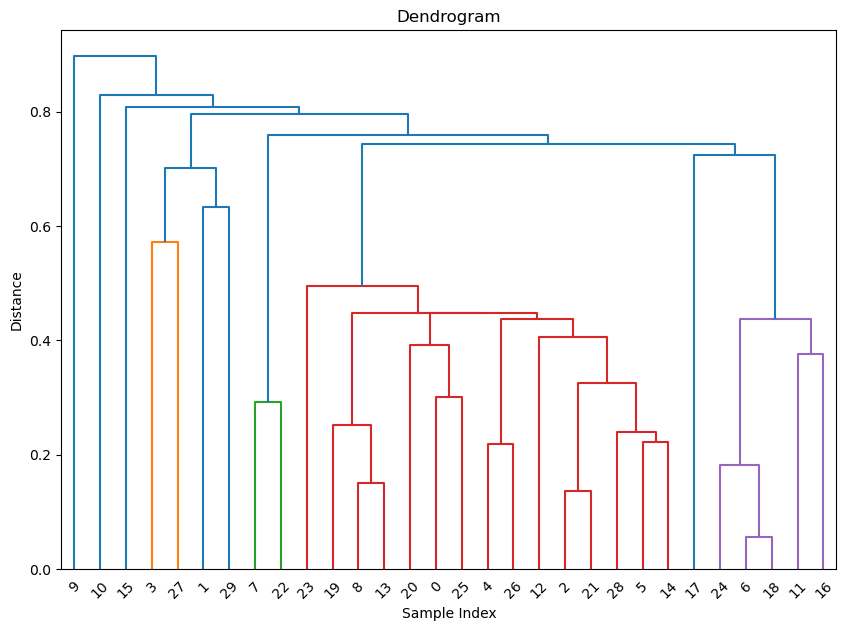

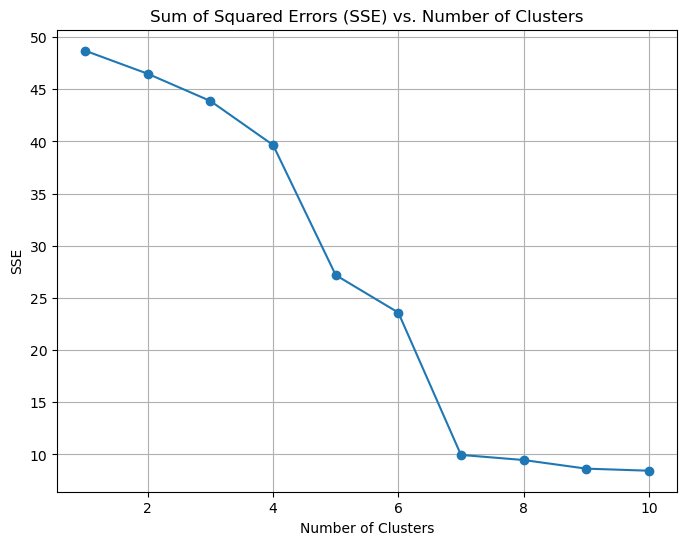

Is the clustering valid? No


In [1]:
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from math import erf

# Generate random data for clustering
np.random.seed(42)
n_samples = 30
X = np.random.randn(n_samples, 2)

# Dissimilarity function - using delta_min (min distance between points of two clusters)
def delta_min(Di, Dj, X):
    min_dist = np.inf
    for x in Di:
        for x_prime in Dj:
            dist = np.linalg.norm(X[x] - X[x_prime])
            if dist < min_dist:
                min_dist = dist
    return min_dist

# Dissimilarity function - using delta_max (max distance between points of two clusters)
def delta_max(Di, Dj, X):
    max_dist = -np.inf
    for x in Di:
        for x_prime in Dj:
            dist = np.linalg.norm(X[x] - X[x_prime])
            if dist > max_dist:
                max_dist = dist
    return max_dist

# Custom agglomerative hierarchical clustering using delta_min or delta_max
def custom_agglomerative_clustering(X, metric_func, linkage='single'):
    # Compute pairwise distances for all pairs of samples
    dist_matrix = pdist(X)
    
    # Perform agglomerative clustering using custom dissimilarity metric
    Z = sch.linkage(dist_matrix, method=linkage)
    
    # Create dendrogram
    plt.figure(figsize=(10, 7))
    sch.dendrogram(Z)
    plt.title('Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()
    
    return Z

# Example usage with delta_max as the metric
Z = custom_agglomerative_clustering(X, delta_max, linkage='single')

# Cluster validity based on sum of squared errors (SSE)
def sum_squared_error(X, labels):
    n = len(X)
    sse = 0
    for label in np.unique(labels):
        cluster_points = X[labels == label]
        cluster_mean = np.mean(cluster_points, axis=0)
        sse += np.sum((cluster_points - cluster_mean) ** 2)
    return sse

# Validity test based on SSE
def cluster_validity(X, max_clusters=10):
    sse_values = []
    for k in range(1, max_clusters + 1):
        # Perform clustering using k clusters
        labels = sch.fcluster(Z, k, criterion='maxclust')
        sse = sum_squared_error(X, labels)
        sse_values.append(sse)
    
    # Plot SSE as a function of the number of clusters
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), sse_values, marker='o')
    plt.title('Sum of Squared Errors (SSE) vs. Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.grid(True)
    plt.show()
    
    return sse_values

# Perform validity test
sse_values = cluster_validity(X, max_clusters=10)

# Calculate significance of the SSE drop
def compute_significance(sse_values):
    Je1 = sse_values[0]  # SSE for 1 cluster
    Je2 = sse_values[1]  # SSE for 2 clusters
    
    # Assuming normal distribution approximation
    n = len(X)
    d = X.shape[1]
    alpha = 0.05  # significance level
    
    sigma_hat = Je1 / (n * d)
    critical_value = (Je2 / Je1) * (2 * (1 - 8 / (np.pi ** 2 * d))) / (np.pi * d)
    
    return critical_value < alpha

# Check validity based on the calculated significance
validity = compute_significance(sse_values)
print(f"Is the clustering valid? {'Yes' if validity else 'No'}")


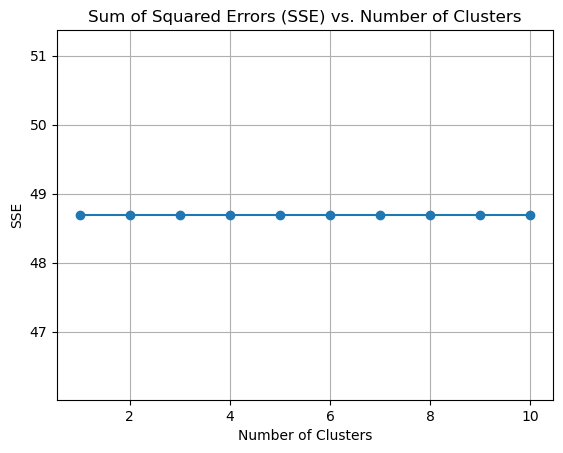

Is the clustering valid? No


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Random Data
np.random.seed(42)
n_samples = 30
X = np.random.randn(n_samples, 2)

# Step 2: Define Dissimilarity Functions (delta_min and delta_max)
def delta_min(Di, Dj, X):
    min_dist = np.inf
    for x in Di:
        for x_prime in Dj:
            dist = np.linalg.norm(X[x] - X[x_prime])  # Euclidean distance
            if dist < min_dist:
                min_dist = dist
    return min_dist

def delta_max(Di, Dj, X):
    max_dist = -np.inf
    for x in Di:
        for x_prime in Dj:
            dist = np.linalg.norm(X[x] - X[x_prime])  # Euclidean distance
            if dist > max_dist:
                max_dist = dist
    return max_dist

# Step 3: Custom Agglomerative Hierarchical Clustering using delta_min or delta_max
def agglomerative_clustering(X, metric_func, linkage='single'):
    clusters = {i: [i] for i in range(len(X))}  # Initial clusters (each point is its own cluster)
    dist_matrix = np.zeros((len(X), len(X)))
    
    # Compute the initial distance matrix
    for i in range(len(X)):
        for j in range(i + 1, len(X)):
            dist_matrix[i, j] = dist_matrix[j, i] = np.linalg.norm(X[i] - X[j])
    
    while len(clusters) > 1:
        # Find the pair of clusters with the smallest distance
        min_dist = np.inf
        min_i, min_j = -1, -1
        
        for i in clusters:
            for j in clusters:
                if i < j:  # Avoid self-pairing
                    if linkage == 'single':
                        dist = metric_func(clusters[i], clusters[j], X)
                    elif linkage == 'complete':
                        dist = metric_func(clusters[i], clusters[j], X)
                    elif linkage == 'average':
                        dist = np.mean([np.linalg.norm(X[x] - X[y]) for x in clusters[i] for y in clusters[j]])
                    if dist < min_dist:
                        min_dist = dist
                        min_i, min_j = i, j

        # Merge the two closest clusters
        clusters[min_i] += clusters[min_j]
        del clusters[min_j]
    
    return clusters

# Step 4: Sum of Squared Errors (SSE) Calculation
def sum_squared_error(X, labels):
    sse = 0
    for label in np.unique(labels):
        cluster_points = X[labels == label]
        cluster_mean = np.mean(cluster_points, axis=0)
        sse += np.sum((cluster_points - cluster_mean) ** 2)
    return sse

# Step 5: Cluster Validity Testing based on SSE
def cluster_validity(X, max_clusters=10):
    sse_values = []
    labels_history = []

    # Test for different numbers of clusters
    for k in range(1, max_clusters + 1):
        # Perform clustering
        clusters = agglomerative_clustering(X, delta_max, linkage='single')  # Using delta_max
        labels = np.zeros(len(X))
        for label, cluster in enumerate(clusters.values()):
            for index in cluster:
                labels[index] = label
        
        # Calculate SSE for the current partition
        sse = sum_squared_error(X, labels)
        sse_values.append(sse)
        labels_history.append(labels)
    
    # Plot SSE as a function of the number of clusters
    plt.plot(range(1, max_clusters + 1), sse_values, marker='o')
    plt.title('Sum of Squared Errors (SSE) vs. Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.grid(True)
    plt.show()

    return sse_values, labels_history

# Step 6: Validity test significance (change in SSE)
def compute_significance(sse_values):
    Je1 = sse_values[0]  # SSE for 1 cluster
    Je2 = sse_values[1]  # SSE for 2 clusters
    
    n = len(X)
    d = X.shape[1]
    alpha = 0.05  # significance level
    
    sigma_hat = Je1 / (n * d)
    critical_value = (Je2 / Je1) * (2 * (1 - 8 / (np.pi ** 2 * d))) / (np.pi * d)
    
    return critical_value < alpha

# Run the cluster validity test
sse_values, labels_history = cluster_validity(X, max_clusters=10)

# Check if the clustering split is statistically valid
validity = compute_significance(sse_values)
print(f"Is the clustering valid? {'Yes' if validity else 'No'}")


In [ ]:
import math
import random
import matplotlib.pyplot as plt

# Step 1: Generate Random Data (Manual Data Generation)
random.seed(42)

def generate_random_data(n_samples, n_features):
    return [[random.gauss(0, 1) for _ in range(n_features)] for _ in range(n_samples)]

# Step 2: Define Euclidean Distance Function
def euclidean_distance(x, y):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(x, y)))

# Step 3: Define Dissimilarity Functions (delta_min and delta_max)
def delta_min(Di, Dj, data):
    min_dist = float('inf')
    for x in Di:
        for x_prime in Dj:
            dist = euclidean_distance(data[x], data[x_prime])
            if dist < min_dist:
                min_dist = dist
    return min_dist

def delta_max(Di, Dj, data):
    max_dist = -float('inf')
    for x in Di:
        for x_prime in Dj:
            dist = euclidean_distance(data[x], data[x_prime])
            if dist > max_dist:
                max_dist = dist
    return max_dist

# Step 4: Agglomerative Clustering Algorithm
def agglomerative_clustering(data, metric_func, linkage='single'):
    n = len(data)
    clusters = {i: [i] for i in range(n)}  # Initial clusters: each point is its own cluster

    while len(clusters) > 1:
        min_dist = float('inf')
        min_i, min_j = -1, -1
        
        # Find the closest pair of clusters
        for i in clusters:
            for j in clusters:
                if i < j:
                    dist = metric_func(clusters[i], clusters[j], data)
                    if dist < min_dist:
                        min_dist = dist
                        min_i, min_j = i, j
        
        # Merge the closest clusters
        clusters[min_i] += clusters[min_j]
        del clusters[min_j]
    
    return clusters

# Step 5: Calculate Sum of Squared Errors (SSE)
def sum_squared_error(data, labels):
    sse = 0
    unique_labels = set(labels)
    
    for label in unique_labels:
        cluster_points = [data[i] for i in range(len(data)) if labels[i] == label]
        cluster_mean = [sum(dim) / len(dim) for dim in zip(*cluster_points)]
        sse += sum(sum((p - m) ** 2 for p, m in zip(point, cluster_mean)) for point in cluster_points)
    
    return sse

# Step 6: Cluster Validity Testing (Using SSE)
def cluster_validity(data, max_clusters=10):
    sse_values = []
    labels_history = []

    # Try clustering for different number of clusters
    for k in range(1, max_clusters + 1):
        clusters = agglomerative_clustering(data, delta_max, linkage='single')  # Using delta_max
        labels = [-1] * len(data)
        
        for label, cluster in enumerate(clusters.values()):
            for index in cluster:
                labels[index] = label
        
        sse = sum_squared_error(data, labels)
        sse_values.append(sse)
        labels_history.append(labels)

    # Plot SSE vs number of clusters
    plt.plot(range(1, max_clusters + 1), sse_values, marker='o')
    plt.title('Sum of Squared Errors (SSE) vs. Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.grid(True)
    plt.show()

    return sse_values, labels_history

# Step 7: Statistical Significance of Clustering
def compute_significance(sse_values, alpha=0.05):
    Je1 = sse_values[0]  # SSE for 1 cluster
    Je2 = sse_values[1]  # SSE for 2 clusters
    
    n = len(sse_values)
    d = len(sse_values[0])  # Assuming the first data sample defines the dimensionality
    sigma_hat = Je1 / (n * d)  # Estimation of sigma squared

    # Computing the significance level (critical value)
    critical_value = (Je2 / Je1) * (2 * (1 - 8 / (math.pi ** 2 * d))) / (math.pi * d)
    
    return critical_value < alpha

# Generate some random data (e.g., 30 samples, 2 features)
data = generate_random_data(30, 2)

# Perform cluster validity test (SSE vs. Number of Clusters)
sse_values, labels_history = cluster_validity(data, max_clusters=10)

# Check if the clustering is valid (based on SSE)
validity = compute_significance(sse_values)
print(f"Is the clustering valid? {'Yes' if validity else 'No'}")


# Competitive Learning

## Overview

Competitive learning is a clustering algorithm closely related to decision-directed versions of k-means. Like k-means, the algorithm begins with initializing the number of clusters and their centers. However, the methods for updating the cluster centers differ:

- **Decision-directed k-means**: Each cluster center is updated as the mean of the current provisional members.
- **Competitive learning**: Adjustments are confined to the single cluster center most similar to the presented pattern.

This distinction allows competitive learning to avoid altering clusters far from the current pattern, which can be desirable in certain scenarios. However, this method does not minimize a single global cost function.

---
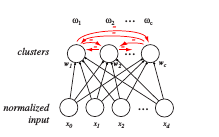

Fig.14: The two-layer network which implements the competitive learning al- gorithm consists of d + 1 input units and c output or cluster units. Each augmented input pattern is normalized to unit length, i.e., x = 1, as is the set of weights at each cluster unit. When a pattern is presented, each of the cluster units computes its net activation netj = wjt x; only the weights at the most active cluster unit are modiﬁed. (The suppression of activity in all but the most active cluster units can be implemented by competition among these units, as indicated by the red arrows.) The weights of the most active unit are then modiﬁed to be more similar to the pattern presented.


## Algorithm Implementation

Competitive learning can be implemented using a two-layer neural network as shown in Figure 10.14. The key components of the algorithm include:

### Data Preprocessing
1. **Augment Patterns**: Each $ d $-dimensional pattern \( x \) is augmented with $ x_0 = 1 $.
2. **Normalize Patterns**: Normalize $ x $ to unit length, such that $ \|x\| = 1 $.

### Neural Network Structure
- **Input Layer**: $ d+1 $ input units corresponding to augmented and normalized patterns.
- **Output Layer**: $ c $ cluster units, each representing a cluster center $ \omega_j $, initialized with normalized random weight vectors $ w_j $, where $ \|w_j\| = 1 $.

### Learning Process
1. Compute the net activation for each cluster unit:
   $$
   \text{net}_j = w_j^T x
   $$
2. Identify the most active cluster unit $ j^* $:
   $$
   j^* = \arg\max_j (\text{net}_j)
   $$
3. Update the weights of the most active unit:
   $$
   w_{j^*}(t+1) = w_{j^*}(t) + \eta x
   $$
4. Normalize the updated weights:
   $$
   w_{j^*} \leftarrow \frac{w_{j^*}}{\|w_{j^*}\|}
   $$

---
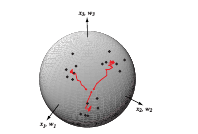

Fig.15: All of the three-dimensional patterns have been normalized $( (x_2)_i = 1)$, i=1


## Algorithm 6: Competitive Learning


$$
\textbf{Algorithm: Competitive Learning}
$$

**Steps:**

1. **Initialize**:  
   $$
   \eta, \, n, \, c, \, w_1, \, w_2, \, \dots, \, w_c
   $$

2. **For each input pattern** $i = 1$ to $n$:
   - Augment the input:  
     $$
     x_i \leftarrow \{1, x_i\}
     $$

   - Normalize the input:  
     $$
     x_i \leftarrow \frac{x_i}{\|x_i\|}
     $$

3. **Repeat until convergence**:
   - Randomly select a pattern $x$.
   - Determine the winning neuron:  
     $$
     j \leftarrow \arg\max_j (w_j^T x)
     $$

   - Update the weights of the winning neuron:  
     $$
     w_j \leftarrow w_j + \eta x
     $$

   - Normalize the weights:  
     $$
     w_j \leftarrow \frac{w_j}{\|w_j\|}
     $$

4. Stop when there is no significant change in weights for $n$ consecutive attempts.

5. **Return**:  
   $$
   w_1, \, w_2, \, \dots, \, w_c
   $$

**Note**:  
- $\eta$ is the learning rate.  
- $n$ is the number of input patterns.  
- $c$ is the number of neurons or clusters.  
- $w_j$ represents the weights for the $j$-th neuron.



In [ ]:
import numpy as np

def competitive_learning(data, num_neurons, learning_rate, max_attempts=100):
    """
    Implements the Competitive Learning algorithm.

    Parameters:
        data (ndarray): Input data, shape (n_samples, n_features).
        num_neurons (int): Number of neurons (clusters).
        learning_rate (float): Learning rate for weight updates.
        max_attempts (int): Maximum number of consecutive attempts without significant weight change.

    Returns:
        ndarray: Final weight vectors, shape (num_neurons, n_features).
    """
    # Augment data with bias term (optional)
    data = np.hstack((np.ones((data.shape[0], 1)), data))
    
    # Normalize the input data
    data = data / np.linalg.norm(data, axis=1, keepdims=True)

    # Initialize weights randomly
    num_features = data.shape[1]
    weights = np.random.rand(num_neurons, num_features)
    weights = weights / np.linalg.norm(weights, axis=1, keepdims=True)  # Normalize weights

    attempts = 0  # Count of attempts without significant change
    while attempts < max_attempts:
        # Select a random input pattern
        x = data[np.random.randint(data.shape[0])]

        # Find the winning neuron
        j = np.argmax(weights @ x)

        # Compute the old weights for comparison
        old_weights = weights[j].copy()

        # Update the weights of the winning neuron
        weights[j] += learning_rate * x
        weights[j] /= np.linalg.norm(weights[j])  # Normalize the weights

        # Check for significant change in weights
        if np.allclose(weights[j], old_weights, atol=1e-6):
            attempts += 1
        else:
            attempts = 0  # Reset attempts if there is a significant change

    return weights

# Example usage
if __name__ == "__main__":
    # Generate random input data
    np.random.seed(42)
    data = np.random.rand(100, 2)  # 100 samples, 2 features

    # Run competitive learning
    num_neurons = 3
    learning_rate = 0.1
    weights = competitive_learning(data, num_neurons, learning_rate)

    print("Final weights:")
    print(weights)


In [ ]:
import random
import math

def normalize(vector):
    """Normalizes a vector."""
    magnitude = math.sqrt(sum(x**2 for x in vector))
    return [x / magnitude for x in vector]

def dot_product(vector1, vector2):
    """Calculates the dot product of two vectors."""
    return sum(x * y for x, y in zip(vector1, vector2))

def competitive_learning(data, num_neurons, learning_rate, max_attempts=100):
    """
    Implements the Competitive Learning algorithm without NumPy.

    Parameters:
        data (list of list): Input data, shape (n_samples, n_features).
        num_neurons (int): Number of neurons (clusters).
        learning_rate (float): Learning rate for weight updates.
        max_attempts (int): Maximum number of consecutive attempts without significant weight change.

    Returns:
        list of list: Final weight vectors, shape (num_neurons, n_features).
    """
    # Augment data with bias term (optional)
    data = [[1] + sample for sample in data]

    # Normalize the input data
    data = [normalize(sample) for sample in data]

    # Initialize weights randomly
    num_features = len(data[0])
    weights = [[random.random() for _ in range(num_features)] for _ in range(num_neurons)]
    weights = [normalize(w) for w in weights]

    attempts = 0  # Count of attempts without significant change
    while attempts < max_attempts:
        # Select a random input pattern
        x = random.choice(data)

        # Find the winning neuron
        dot_products = [dot_product(w, x) for w in weights]
        j = dot_products.index(max(dot_products))

        # Compute the old weights for comparison
        old_weights = weights[j][:]

        # Update the weights of the winning neuron
        weights[j] = [w + learning_rate * xi for w, xi in zip(weights[j], x)]
        weights[j] = normalize(weights[j])  # Normalize the weights

        # Check for significant change in weights
        if all(abs(w - old_w) < 1e-6 for w, old_w in zip(weights[j], old_weights)):
            attempts += 1
        else:
            attempts = 0  # Reset attempts if there is a significant change

    return weights

# Example usage
if __name__ == "__main__":
    # Generate random input data
    random.seed(42)
    data = [[random.random(), random.random()] for _ in range(100)]  # 100 samples, 2 features

    # Run competitive learning
    num_neurons = 3
    learning_rate = 0.1
    weights = competitive_learning(data, num_neurons, learning_rate)

    print("Final weights:")
    for w in weights:
        print(w)


In [ ]:
import random
import math
import matplotlib.pyplot as plt

def normalize(vector):
    """Normalizes a vector."""
    magnitude = math.sqrt(sum(x**2 for x in vector))
    return [x / magnitude for x in vector]

def dot_product(vector1, vector2):
    """Calculates the dot product of two vectors."""
    return sum(x * y for x, y in zip(vector1, vector2))

def competitive_learning(data, num_neurons, learning_rate, max_attempts=100):
    """
    Implements the Competitive Learning algorithm without NumPy.

    Parameters:
        data (list of list): Input data, shape (n_samples, n_features).
        num_neurons (int): Number of neurons (clusters).
        learning_rate (float): Learning rate for weight updates.
        max_attempts (int): Maximum number of consecutive attempts without significant weight change.

    Returns:
        list of list: Final weight vectors, shape (num_neurons, n_features).
    """
    # Augment data with bias term (optional)
    data = [[1] + sample for sample in data]

    # Normalize the input data
    data = [normalize(sample) for sample in data]

    # Initialize weights randomly
    num_features = len(data[0])
    weights = [[random.random() for _ in range(num_features)] for _ in range(num_neurons)]
    weights = [normalize(w) for w in weights]

    attempts = 0  # Count of attempts without significant change
    while attempts < max_attempts:
        # Select a random input pattern
        x = random.choice(data)

        # Find the winning neuron
        dot_products = [dot_product(w, x) for w in weights]
        j = dot_products.index(max(dot_products))

        # Compute the old weights for comparison
        old_weights = weights[j][:]

        # Update the weights of the winning neuron
        weights[j] = [w + learning_rate * xi for w, xi in zip(weights[j], x)]
        weights[j] = normalize(weights[j])  # Normalize the weights

        # Check for significant change in weights
        if all(abs(w - old_w) < 1e-6 for w, old_w in zip(weights[j], old_weights)):
            attempts += 1
        else:
            attempts = 0  # Reset attempts if there is a significant change

    return weights

def plot_results(data, weights):
    """
    Plots the input data and the weight vectors.

    Parameters:
        data (list of list): Input data, shape (n_samples, 2).
        weights (list of list): Weight vectors, shape (num_neurons, 3).
    """
    # Remove the bias term for plotting
    data = [point[1:] for point in data]  # Drop the bias term
    weights = [w[1:] for w in weights]   # Drop the bias term

    # Separate data points for plotting
    x_coords, y_coords = zip(*data)

    # Plot input data
    plt.scatter(x_coords, y_coords, color='blue', label='Data Points', alpha=0.6)

    # Plot weight vectors
    for i, w in enumerate(weights):
        plt.plot([0, w[0]], [0, w[1]], label=f'Neuron {i+1}', linewidth=2)

    # Add labels and legend
    plt.title("Competitive Learning: Data and Neuron Weights")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.axis("equal")
    plt.show()

# Example usage
if __name__ == "__main__":
    # Generate random input data
    random.seed(42)
    data = [[random.random(), random.random()] for _ in range(100)]  # 100 samples, 2 features

    # Run competitive learning
    num_neurons = 3
    learning_rate = 0.1
    weights = competitive_learning(data, num_neurons, learning_rate)

    # Plot results
    plot_results(data, weights)


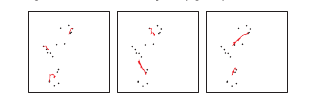

Fig.16: In leader-follower clustering, the number of clusters and their centers depend upon the random sequence of data presentations. The three simulations shown employed the same learning rate η, threshold θ, and number of presentations of each point (50), but diﬀer in the random sequence of presentations. Notice that in the simulation on the left, three clusters are generated whereas in the other simulations, only two.

##  Unknown Number of Clusters

When the number of clusters is unknown, we can proceed in one of two general ways:

1. **Cluster Criterion Comparison**:  
   Compare some cluster criterion as a function of the number of clusters. If there is a large gap in the criterion values, it suggests a "natural" number of clusters.

2. **Threshold for New Cluster Creation**:  
   This approach is useful in on-line cases. A new cluster is created if a certain similarity threshold is not met. The drawback is that this method depends strongly on the order of data presentation.

---

### Off-line vs. On-line Clustering

- **Off-line Clustering**:  
  Algorithms such as k-means and hierarchical clustering typically assume that all data is present before clustering begins.
  
- **On-line Clustering**:  
  In some cases, clustering must be performed on-line as data streams in. This could be due to:
  - Limited memory to store all patterns.
  - Time-critical situations where clusters need to be used before all data is available.

Graph-theoretic methods can often be performed on-line by linking a new pattern to an existing cluster based on a similarity measure. However, for methods like k-means, modifications are needed to handle on-line scenarios effectively.

---

### Representing Clusters On-line

- Represent clusters by their **centers** (e.g., means).
- Update these centers based on the incoming pattern.

Assuming the number of clusters is known, suppose we have $ c $ cluster centers initialized at random positions or based on the first $ c $ patterns. For a new pattern, the simplest approach is:

1. Identify the cluster center most similar to the new pattern.
2. Adjust this cluster center to be more like the new pattern.

---

### Algorithm 7: Basic Leader-Follower Clustering

This algorithm uses a threshold $ \theta $ and learning rate $ \eta $ to determine when to create a new cluster.  

**Steps**:
$$
\textbf{Algorithm: Basic Leader-Follower Clustering}
$$

1. **Initialize**:  
   $$
   \eta \text{ (learning rate)}, \; \theta \text{ (threshold)}.
   $$

2. **Initialize the first cluster center**:  
   $$
   \mu_1 \leftarrow x
   $$

3. **For each new pattern**:
   - Find the nearest cluster center:  
     $$
     j \leftarrow \arg \min_j \|x - \mu_j\|
     $$

   - If the distance is below the threshold:  
     $$
     \|x - \mu_j\| < \theta
     $$  
     Update the cluster center:  
     $$
     \mu_j \leftarrow \mu_j + \eta x
     $$

   - Otherwise, create a new cluster:  
     $$
     \mu_{new} \leftarrow x
     $$

   - Normalize the cluster center:  
     $$
     \mu_j \leftarrow \frac{\mu_j}{\|\mu_j\|}
     $$

4. Repeat until no more patterns are available.

5. **Return**:  
   $$
   \mu_1, \mu_2, \dots, \mu_c
   $$

---

### Observations on Leader-Follower Clustering

- **Order Dependency**:  
  The number and arrangement of clusters depend on the sequence in which data is presented.  
  - Example: With the same $ \eta, \theta $, and number of pattern presentations, different sequences can result in different clusters (Fig.16).

- **Instability**:  
  Patterns can alternate between clusters, especially during early iterations (Fig. 10.17).

---

###  Adaptive Resonance

Adaptive Resonance Theory (ART) modifies the on-line clustering approach to address these issues. The key idea is to ensure stability by comparing the current cluster representation with new patterns before making adjustments.

While ART networks are inspired by biological learning, this explanation focuses on their application to clustering.

**Challenges with Leader-Follower Clustering**:
- Cluster centers may shift unpredictably with certain sequences of patterns.
- A pattern $ x_0 $ that originally belongs to one cluster can be reassigned arbitrarily due to "hostile" data sequences.

**Example**:
A devious sequence of patterns may lead $ x_0 $ to be alternately assigned to multiple clusters. This instability arises because the algorithm does not consider global stability during updates.

---

### Figure References
- **Fig.16**: Shows how different sequences of data presentations lead to varying numbers of clusters.  
- **Fig.17**: Illustrates instability, where a pattern $ x^* $ alternates between clusters during early iterations.

---

**Further Analysis**:  
We will revisit cases with unknown cluster numbers in a later section.


In [ ]:
import random
import math
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    """Calculates the Euclidean distance between two points."""
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

def normalize(vector):
    """Normalizes a vector to have unit length."""
    magnitude = math.sqrt(sum(x ** 2 for x in vector))
    return [x / magnitude for x in vector]

def leader_follower_clustering(data, learning_rate, threshold):
    """
    Leader-Follower Clustering Algorithm.

    Parameters:
        data (list of list): Input data points, shape (n_samples, n_features).
        learning_rate (float): Learning rate for updating cluster centers.
        threshold (float): Distance threshold for cluster creation.

    Returns:
        list of list: Final cluster centers.
        list of int: Cluster assignments for each data point.
    """
    clusters = []  # List of cluster centers
    assignments = []  # Cluster assignments for each data point

    for point in data:
        # Check if the point belongs to an existing cluster
        closest_cluster = None
        closest_distance = float('inf')

        for idx, cluster_center in enumerate(clusters):
            distance = euclidean_distance(point, cluster_center)
            if distance < closest_distance:
                closest_distance = distance
                closest_cluster = idx

        if closest_distance < threshold:
            # Update the closest cluster center
            clusters[closest_cluster] = [
                cluster_center + learning_rate * (coord - cluster_center)
                for cluster_center, coord in zip(clusters[closest_cluster], point)
            ]
            clusters[closest_cluster] = normalize(clusters[closest_cluster])
            assignments.append(closest_cluster)
        else:
            # Create a new cluster
            clusters.append(point)
            assignments.append(len(clusters) - 1)

    return clusters, assignments

def plot_clusters(data, clusters, assignments):
    """
    Plots data points and their assigned clusters.

    Parameters:
        data (list of list): Input data points.
        clusters (list of list): Cluster centers.
        assignments (list of int): Cluster assignments for each data point.
    """
    # Assign random colors to clusters
    cluster_colors = [plt.cm.tab10(i) for i in range(len(clusters))]

    # Plot each data point with the color of its assigned cluster
    for point, cluster_idx in zip(data, assignments):
        plt.scatter(point[0], point[1], color=cluster_colors[cluster_idx], alpha=0.6)

    # Plot cluster centers
    for idx, cluster_center in enumerate(clusters):
        plt.scatter(cluster_center[0], cluster_center[1], color=cluster_colors[idx], 
                    edgecolor='black', marker='X', s=200, label=f'Cluster {idx+1}')

    plt.title("Leader-Follower Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage
if __name__ == "__main__":
    # Generate random data points
    random.seed(42)
    data = [[random.uniform(0, 10), random.uniform(0, 10)] for _ in range(100)]

    # Parameters
    learning_rate = 0.1
    threshold = 2.5

    # Perform clustering
    clusters, assignments = leader_follower_clustering(data, learning_rate, threshold)

    # Print results
    print("Cluster Centers:")
    for idx, cluster in enumerate(clusters):
        print(f"Cluster {idx+1}: {cluster}")

    # Plot the results
    plot_clusters(data, clusters, assignments)
